Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [2]:
import pandas as pd

yelp_df = pd.read_csv('Yelp_data.csv')
FSQ_df = pd.read_csv('FSQ_API_data.csv')

joining_df = pd.merge(FSQ_df, yelp_df, on=['Name', 'Latitude', 'Longitude'], how='inner')
joining_df.to_csv('Joined_data.csv', index=False) 

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

(12987, 8)


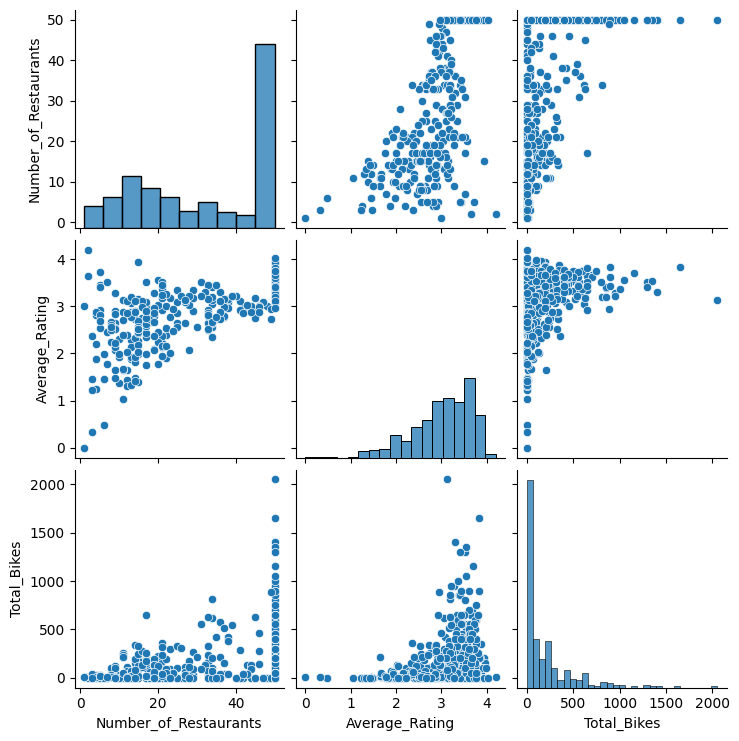

In [ ]:
#USING YELP DATA 

import seaborn as sns

#merging yelp with city bikes and aggregating data

citybikes_df = pd.read_csv('citybikes.csv')

citybikes_df.columns = citybikes_df.columns.str.capitalize() #capitalize first letter of citybikes' column headers
citybikes_df = citybikes_df.rename(columns={'Name': 'Bike_Station'})

merged_df = pd.merge(citybikes_df, yelp_df, on=['Latitude', 'Longitude'], how='inner')
merged_df

print(merged_df.shape) #check how many variables and observations

merged_df.dtypes #check the column names and their data types

#check for duplicate restaurant entries based on all columns
duplicates = merged_df[merged_df.duplicated()]
duplicates #no duplicates found

#count null values per column 
null_values = merged_df.isnull().sum()
null_values #no null values found 

#aggregate dataframe
aggregate_df = merged_df.groupby(['Bike_Station'], as_index=False).agg(Number_of_Restaurants=('Name', 'count'), Average_Rating=('Rating', 'mean'), Total_Bikes=('Number_of_bikes', 'sum'))
aggregate_df.to_csv('aggregate_data.csv', index=False)

#check for relationships
sns.pairplot(aggregate_df) #no correlation between all variables

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [17]:
import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

connection = create_connection(r"C:\Users\muham\Documents\Python-Statistical-Modelling-Project\data\data_SQLite_3.sqlite")

def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

create_POI_table = """
CREATE TABLE IF NOT EXISTS poi_table (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  bikestation TEXT NOT NULL,
  numberofrestaurants INTEGER,
  averagerating REAL,
  totalbikes INTEGER
);
"""

def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

def insert_func(connection,bikestation,numberofrestaurants,averagerating,totalbikes):
    cursor = connection.cursor()
    insert_POI = "INSERT INTO poi_table (bikestation,numberofrestaurants,averagerating,totalbikes) VALUES(?,?,?,?)"
    cursor.execute(insert_POI,(bikestation,numberofrestaurants,averagerating,totalbikes))
    connection.commit()

execute_query(connection, create_POI_table) 

select_poi_table = "SELECT * FROM poi_table"

results = execute_read_query(connection,select_poi_table)

for index, row in aggregate_df.iterrows():
    bikestation = row['Bike_Station']
    numberofrestaurants = row['Number_of_Restaurants']
    averagerating = row['Average_Rating']
    totalbikes = row['Total_Bikes']

    insert_func(connection,bikestation,numberofrestaurants,averagerating,totalbikes)

results = execute_read_query(connection,select_poi_table)


Connection to SQLite DB successful
Query executed successfully


Look at the data before and after the join to validate your data.